### Dataset Inspection

When facing a ML problem, the very first thing you shall **always** do before starting your training endevours sit to inspect the dataset. In other words, look at the data, make some short analysis (and meta-analysis) to get a feeling about the type of data you are dealing with. We will demonstrate some basic yet useful techniques in this notebook.

Throughout this notebook, we will be using the famous MNIST (Modified National Institute of Standards and Technology) dataset.

#### MNIST (Dataset Definition)

Before loading any data, you shall learn about the dataset itself, about its definition and structure. In our case, we will refer to the official documentation that you can find [here](http://yann.lecun.com/exdb/mnist/).

There you learn that the dataset consists of 70 000 samples (60k for train and 10k for test). Each sample is a 28x28 monochrome image containing a handwritten digit. It follows that there are 10 different classes (one per each digit). In the provided link, you can also read about how the dataset has been built.

#### Dataset Visualisation

The next step is usually to look at the data themselves. In the beginning, load a subset of random data and visualize them. That way, you will get an impression of what type of data (in this case, what type of handwriting) we are dealing with.

In [1]:
from time import time
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

MNIST is one of the Keras built-in datasets and it can be easily loaded.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's now visualise random subsets of data.

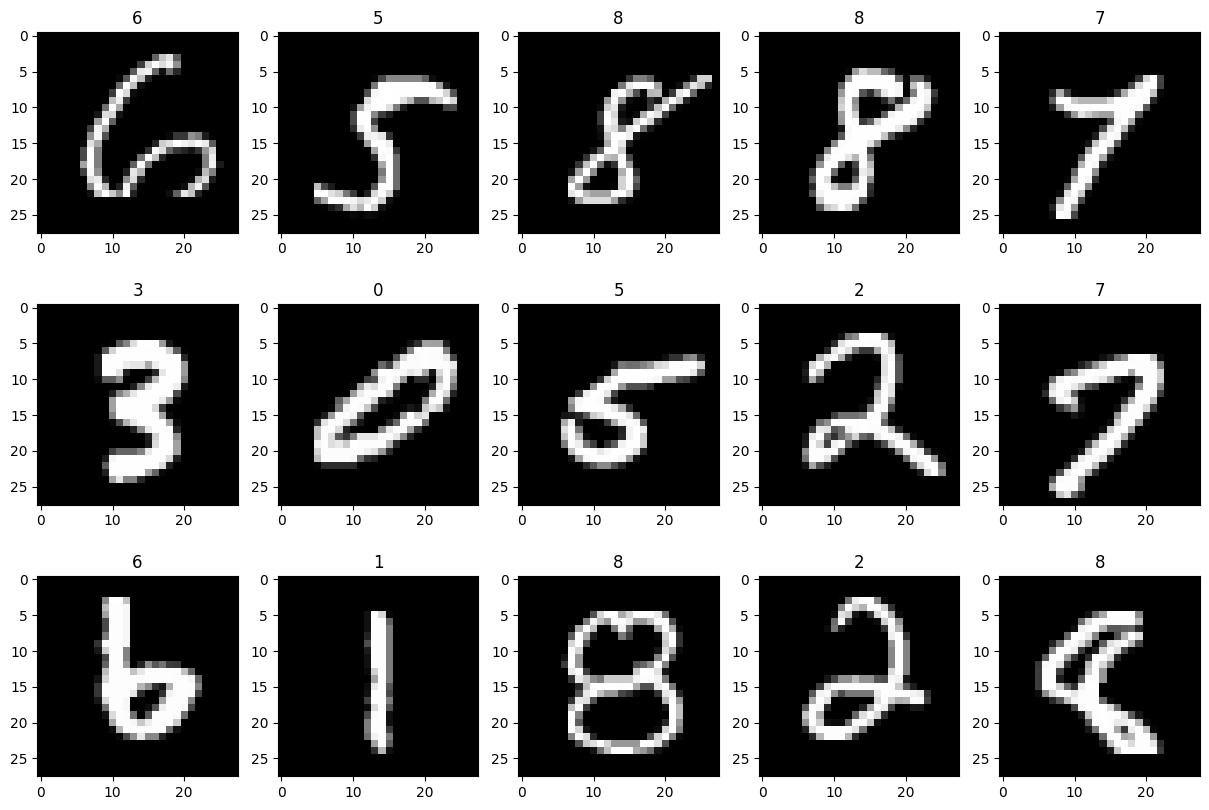

In [5]:
for ii in range(15):
    idx = np.random.randint(0, len(y_train))
    plt.subplot(3,5,ii+1), plt.imshow(x_train[idx, ...], cmap='gray'), plt.title(y_train[idx])

#### Class Histograms

In order to correctly design you learning (training) strategies, it is important to analyse how well are the different classes represented in the dataset. In other words, we are trying to answer the following questions:
* Do we have enough samples for each class?
* Are there classes that are under-represented?
* Are there classes that are over-represented?
* Is the class distribution reflecting the real world?

In order to answer these questions, a very powerful tool is to plot the class histogram.

(Text(0.5, 0, 'Class ID'), Text(0, 0.5, 'counts'))

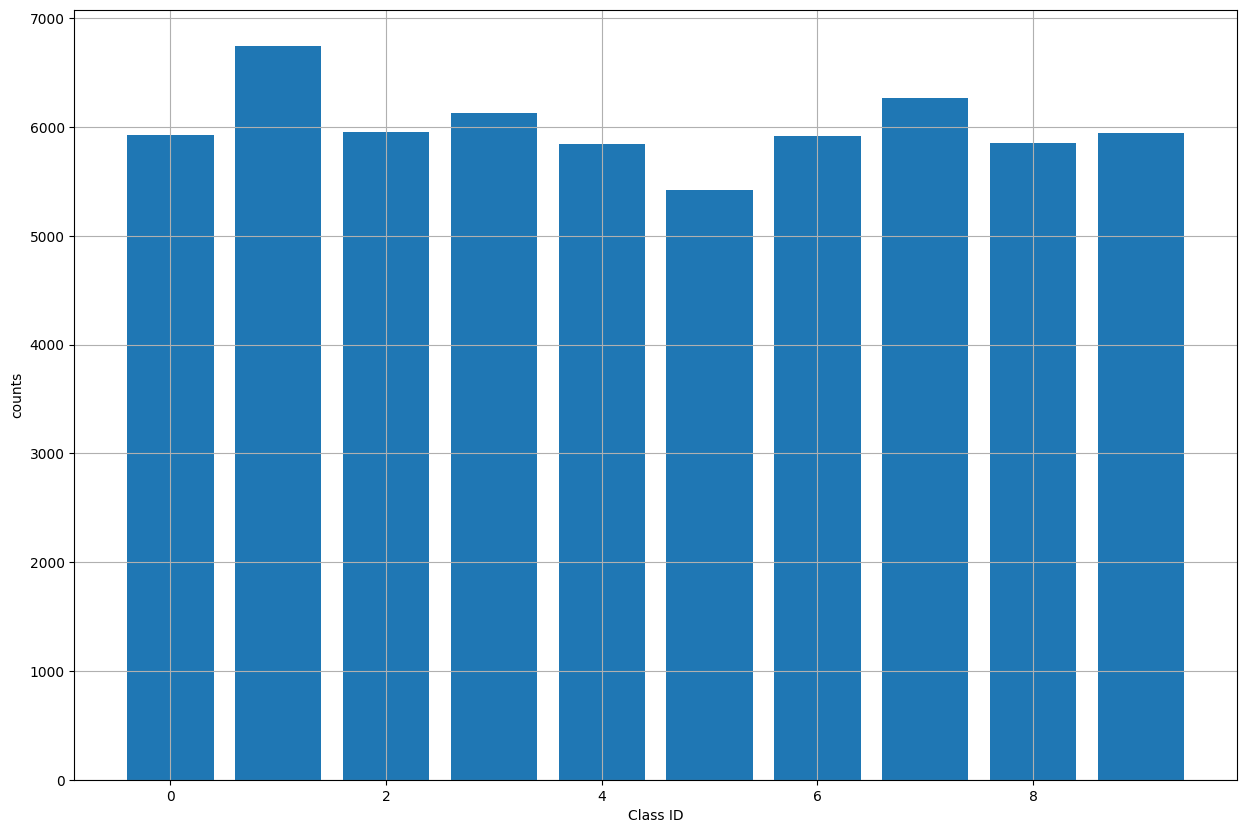

In [6]:
centers = np.arange(0, num_classes + 1)
counts, bounds = np.histogram(y_train, bins=centers-0.5)

plt.bar(centers[:-1], counts), plt.grid(True)
plt.xlabel('Class ID'), plt.ylabel('counts')

Even though the class distribution is not totally homogeneous, we can conclude that no class is significantly over/under-represented. In relative terms, the histogram looks as shown below. A perfectly balanced dataset would have 10% of samples of each class.

(Text(0.5, 0, 'Class ID'), Text(0, 0.5, 'counts'))

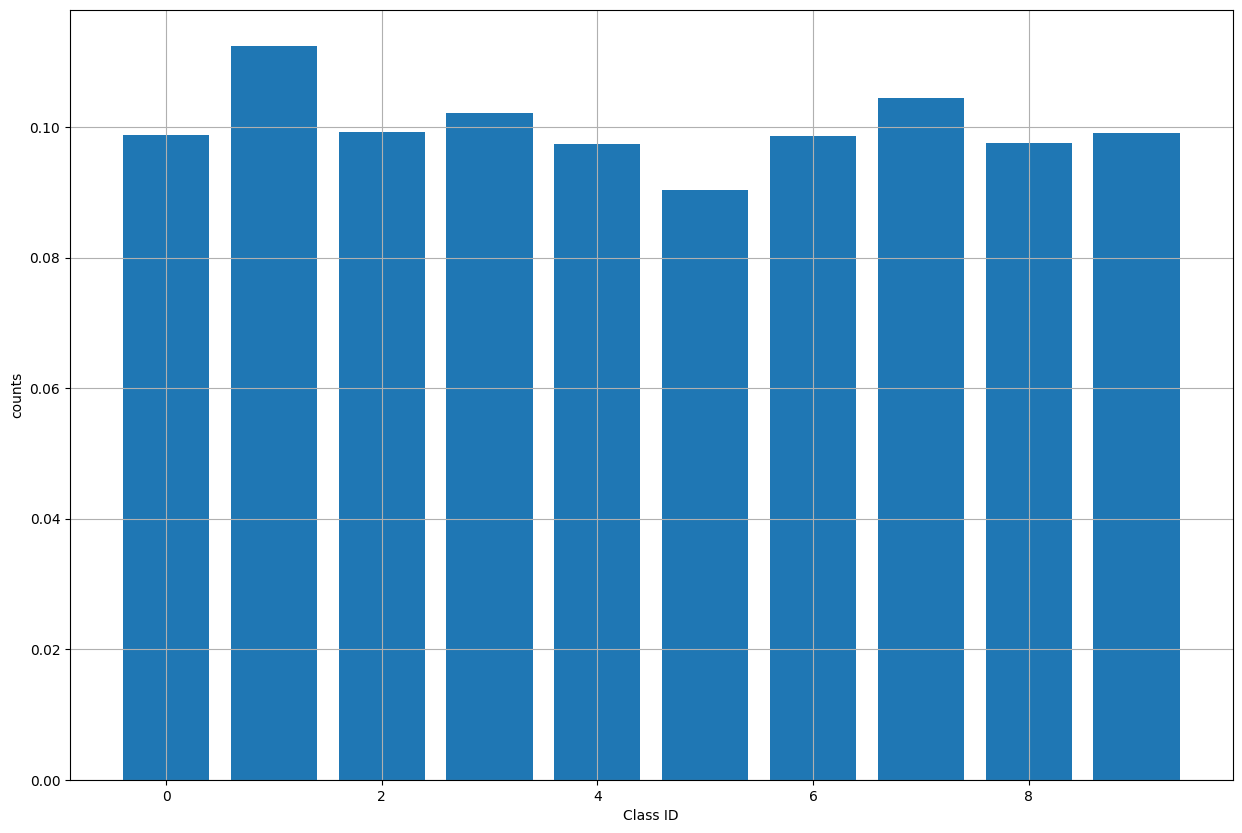

In [7]:
plt.bar(centers[:-1], counts/np.sum(counts)), plt.grid(True)
plt.xlabel('Class ID'), plt.ylabel('counts')

#### Visualisation per Class

Next, we are going to look at random different samples from the same class. The objective is to get a feeling about the amount of variability we can expect from samples corresponding to the same class (the so called inter-class variance).

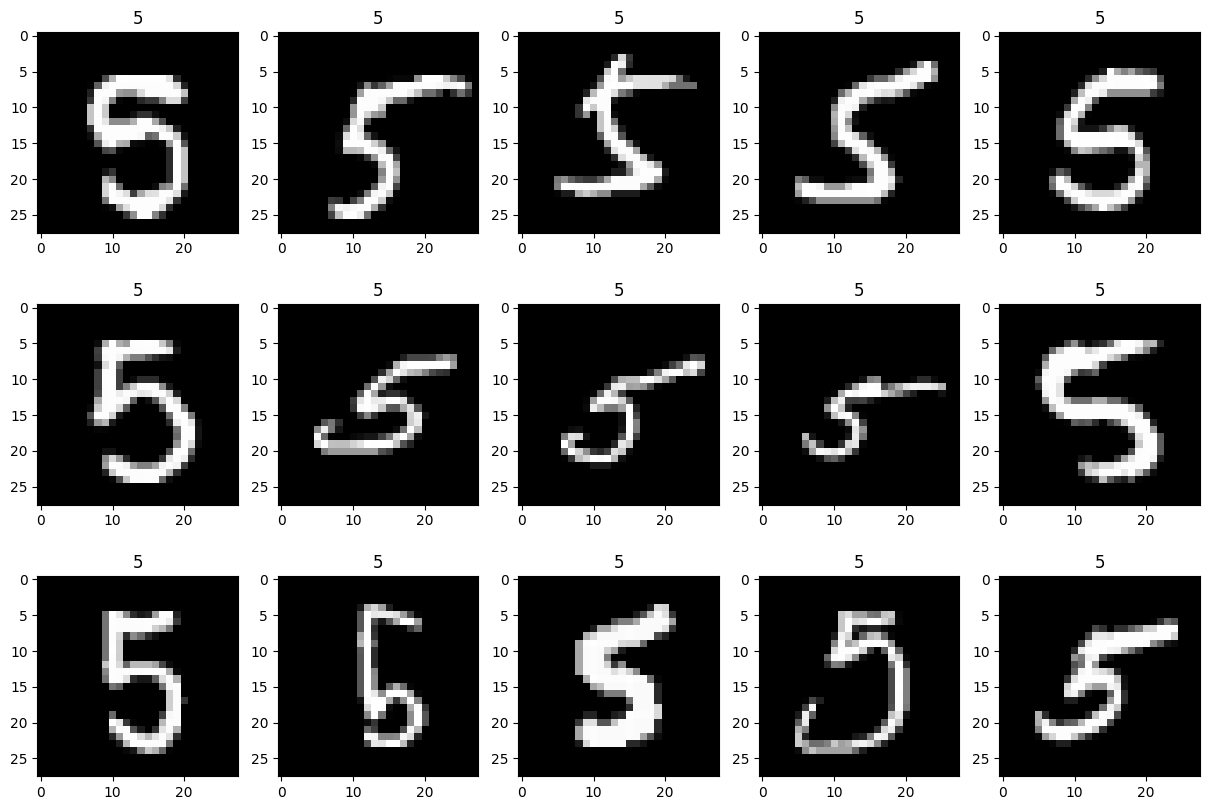

In [8]:
# Locate the samples for a given class ID
class_id = 5
mask = y_train == class_id

# Extract the samples with the given class ID
y_train_ = y_train[mask]
x_train_ = x_train[mask, ...]

# Plot random samples with class ID
for ii in range(15):
    idx = np.random.randint(0, len(y_train_))
    plt.subplot(3,5,ii+1), plt.imshow(x_train_[idx, ...], cmap='gray'), plt.title(y_train_[idx])

### Average Number Templates

We can observe that the samples do exhibit a certain amount of inter-class variance. However, can we say how a certain digit (out of the 10 possible) looks like on average? This is what we are going to do next, i.e., to plot the "average digit" for each class.

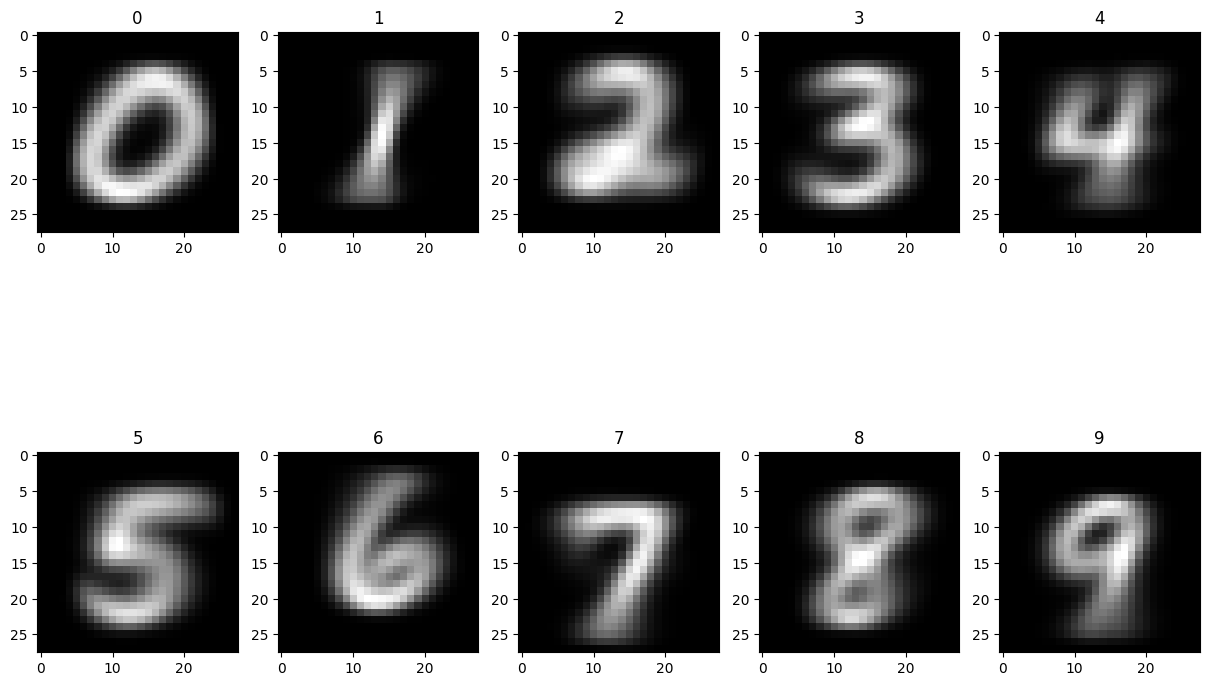

In [9]:
for class_id in range(num_classes):
    # Extract samples for the current class ID
    mask = y_train == class_id
    y_train_ = y_train[mask]
    x_train_ = x_train[mask, ...]

    # Compute the average representation
    x_train_ = x_train_/255
    avg = np.mean(x_train_, axis=0)

    # Show the result
    plt.subplot(2,5,class_id+1), plt.imshow(avg/np.sum(avg), cmap='gray'), plt.title(class_id)

Furthermore, one can also look on the (relative) average area that each digit occupy on the image. From the numbers below, conclude that the digit 1 is by far the smallest one (as expected) meanwhile the digits 0 (somehow suprisingly) and 8 (as expected) are the largest ones.

In [10]:
for class_id in range(num_classes):

    mask = y_train == class_id
    y_train_ = y_train[mask]
    x_train_ = x_train[mask, ...]

    x_train_ = x_train_/255
    avg = np.mean(x_train_ > 0)

    print('Avg rel area for', class_id, ':', avg)

Avg rel area for 0 : 0.24486587223104672
Avg rel area for 1 : 0.10949749968216299
Avg rel area for 2 : 0.21531781141459605
Avg rel area for 3 : 0.208337563536261
Avg rel area for 4 : 0.18087616765295642
Avg rel area for 5 : 0.19429825056752087
Avg rel area for 6 : 0.2001721227524467
Avg rel area for 7 : 0.1675985797351662
Avg rel area for 8 : 0.22106590884516514
Avg rel area for 9 : 0.18243976864573364
